In [ ]:
#@markdown #Mount Google Drive
#@markdown - To save time and avoid repeatedly uploading a large audio dataset, the RAVDESS audio dataset can be stored in a Google Drive and loaded directly from there.

#@markdown - By storing the dataset in Google Drive, it can be easily accessed and loaded into Colab. This method is much faster than uploading the dataset each time Colab is opened. Additionally, it ensures that the dataset is always available, and the user does not need to worry about losing or misplacing the files.

#@markdown - Overall, storing large datasets in Google Drive is an efficient and convenient way to manage data, especially for machine learning projects that require large amounts of data.

mount_drive = True #@param {type:"boolean"}
if mount_drive:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#@markdown # Dataset Directory
dataset_path = "/content/drive/MyDrive/Datasets/Bangla Audio/RAVDESS" #@param {type:"string"}

file_list = os.listdir(dataset_path)
print(f"Audio Files: {file_list}")
print(f"Total Audio Files: {len(file_list)}")

Audio Files: ['03-01-07-01-02-02-08.wav', '03-01-03-02-01-01-08.wav', '03-01-04-02-02-02-08.wav', '03-01-06-02-01-02-08.wav', '03-01-04-01-01-01-08.wav', '03-01-04-02-01-01-08.wav', '03-01-02-02-01-01-08.wav', '03-01-07-01-01-01-08.wav', '03-01-05-01-02-02-08.wav', '03-01-03-02-02-02-08.wav', '03-01-05-02-01-01-08.wav', '03-01-08-02-02-02-07.wav', '03-01-04-01-02-02-08.wav', '03-01-05-02-02-02-08.wav', '03-01-05-01-02-01-08.wav', '03-01-04-02-02-01-08.wav', '03-01-03-02-02-01-08.wav', '03-01-01-01-02-02-08.wav', '03-01-02-02-02-02-08.wav', '03-01-02-01-01-02-08.wav', '03-01-06-02-01-01-08.wav', '03-01-07-01-01-02-08.wav', '03-01-02-02-02-01-08.wav', '03-01-02-01-01-01-08.wav', '03-01-03-01-02-02-08.wav', '03-01-06-01-02-01-08.wav', '03-01-03-01-02-01-08.wav', '03-01-06-02-02-01-08.wav', '03-01-02-01-01-02-09.wav', '03-01-04-02-02-02-09.wav', '03-01-05-02-02-01-09.wav', '03-01-06-01-02-02-09.wav', '03-01-06-01-01-01-09.wav', '03-01-07-02-02-01-08.wav', '03-01-07-02-01-01-08.wav', '03-01

In [ ]:
#@markdown # Create a Dataframe of the Dataset

gender_list = []
speaker_id_list = []
speaker_name_list = []
sentence_id_list = []
emotion_list = []
take_id_list = []

for file_name in file_list:
    # Using regular expressions to extract the information from the file name
    parts = file_name.split("-")

    gender = "F" if int(parts[6][:-4]) % 2 == 0 else "M"
    actor_number = parts[6][:-4]
    statement_number = parts[4]
    emotion = {
        "01": "NEUTRAL",
        "02": "CALM",
        "03": "HAPPY",
        "04": "SAD",
        "05": "ANGRY",
        "06": "FEARFUL",
        "07": "DISGUST",
        "08": "SURPRISED"
        }[parts[2]]

    repetition = parts[5]

    # Append the extracted information to the respective lists
    gender_list.append(gender)
    speaker_name_list.append(actor_number)
    sentence_id_list.append(statement_number)
    emotion_list.append(emotion)
    take_id_list.append(repetition)

# Creating a dictionary with the lists as values
data = {
    'gender': gender_list,
    'speaker_name': speaker_name_list,
    'sentence_id': sentence_id_list,
    'emotion': emotion_list,
    'take_id': take_id_list
}

# Creating the DataFrame
df = pd.DataFrame(data)
print("Dataframe created and the variable is df.")


Dataframe created and the variable is df.


In [ ]:
df.head()

,gender,speaker_name,sentence_id,emotion,take_id
0,F,08,02,DISGUST,02
1,F,08,01,HAPPY,01
2,F,08,02,SAD,02
3,F,08,01,FEARFUL,02
4,F,08,01,SAD,01


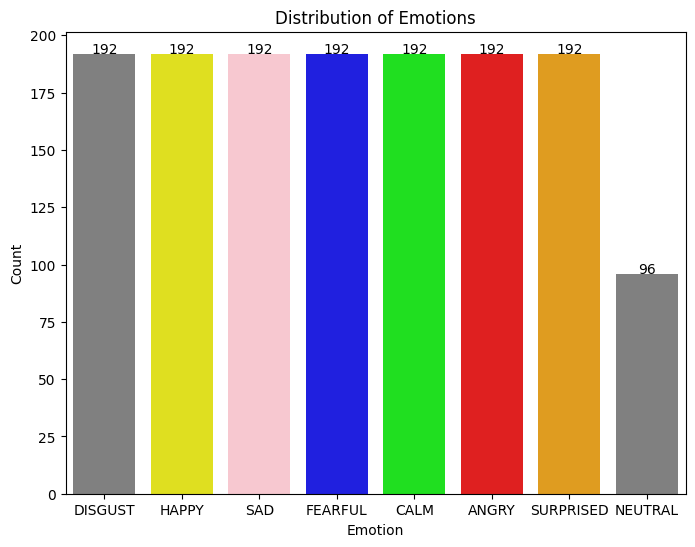

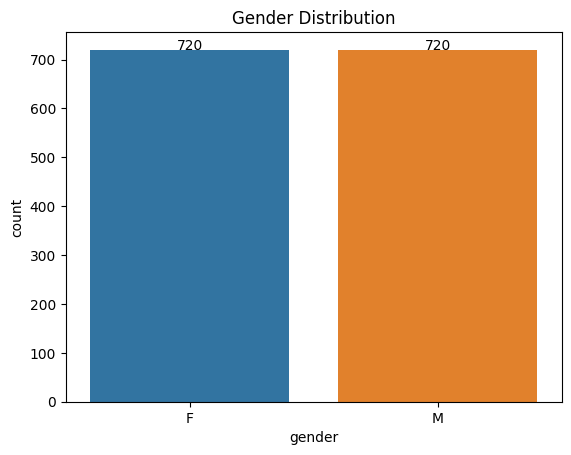

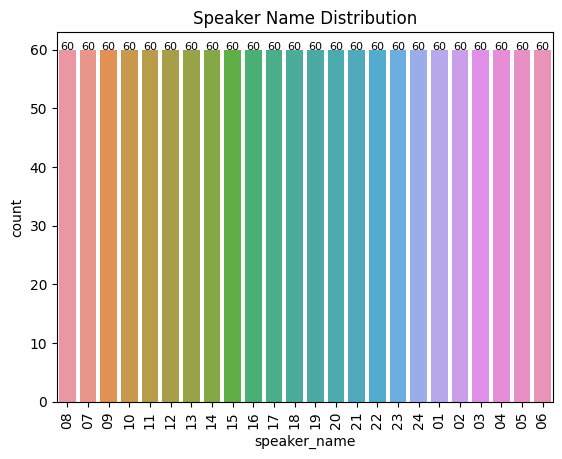

In [ ]:
#@markdown # Data Visualization
#@markdown Display a plot that shows the distribution of emotions in the dataset.
plot_distribution_of_emotions = True #@param {type:"boolean"}

#@markdown Display a plot that shows the distribution of genders in the dataset.
plot_distribution_of_gender = True #@param {type:"boolean"}

#@markdown Display a plot that shows the distribution of speaker names in the dataset.
plot_distribution_of_speaker = True #@param {type:"boolean"}

if plot_distribution_of_emotions:
    # Define the colors for each emotion
    colors = {
        'neutral': '#808080',  # gray
        'happy': '#FFFF00',  # yellow
        'surprise': '#FFC0CB',  # pink
        'sadness': '#0000FF',  # blue
        'disgust': '#00FF00',  # green
        'anger': '#FF0000',  # red
        'fear': '#FFA500',  # orange
    }

    # Set the color palette using the defined colors
    palette = [colors[x] for x in colors]

    # Create the countplot
    plt.figure(figsize=(8,6))
    sns.countplot(x='emotion', data=df, palette=palette, order=df['emotion'].value_counts().index)
    plt.title("Distribution of Emotions")
    plt.xlabel("Emotion")
    plt.ylabel("Count")

    # Add count values to the bars
    for i in range(len(df['emotion'].unique())):
        count = df['emotion'].value_counts().values[i]
        plt.annotate(str(count), xy=(i, count), ha='center', fontsize=10)

    # Show the plot
    plt.show()


if plot_distribution_of_gender:
    # Countplot for Gender distribution
    sns.countplot(x='gender', data=df)
    plt.title('Gender Distribution')
    # Add count values to the bars
    for i in range(len(df['gender'].unique())):
        count = df['gender'].value_counts().values[i]
        plt.annotate(str(count), xy=(i, count), ha='center', fontsize=10)

    # Show the plot
    plt.show()

if plot_distribution_of_speaker:
    # Barplot for Speaker_name distribution
    sns.countplot(x='speaker_name', data=df)
    plt.title('Speaker Name Distribution')
    plt.xticks(rotation=90)
    # Add count values to the bars
    for i in range(len(df['speaker_name'].unique())):
        count = df['speaker_name'].value_counts().values[i]
        plt.annotate(str(count), xy=(i, count), ha='center', fontsize=8)

    # Show the plot
    plt.show()



In [ ]:
directory = "/content/drive/MyDrive/Datasets/Bangla Audio/RAVDESS"
count = 0

for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        parts = filename.split("-")
        emotion = parts[2]

        if emotion == "01":
            count += 1

print(f"Number of files with '01' in the emotion position: {count}")


Number of files with '01' in the emotion position: 96


In [ ]:
#@markdown # Save Dataframe as CSV
sava_dataframe_as_csv = False #@param {type:"boolean"}
csv_directory = "/content/drive/MyDrive/Datasets/Bangla Audio/SUBESCO_CSV.csv" #@param {type: "string"}
if sava_dataframe_as_csv:
  try:
    df.to_csv(csv_directory, index=False)
    print(f"File saved in directory: {csv_directory}")
  except:
    print(f"Error occurred while saving the file to the directory: {csv_directory}")

In [ ]:
#@markdown # Install Libraries

update_apt = True #@param {type:"boolean"}
install_pyaudio = True #@param {type:"boolean"}
install_librosa = True #@param {type:"boolean"}
install_soundfile = True #@param {type:"boolean"}
install_resampy = True #@param {type:"boolean"}

if install_librosa:
  !pip install librosa

if install_soundfile:
  !pip install soundfile

if update_apt:
  !apt-get update

if install_pyaudio:
  !apt-get install -y python3-pyaudio

if install_resampy:
  !pip install resampy


# Importing the required libraries

In [ ]:
import librosa
import soundfile
import glob
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import joblib
import time
import datetime

<div align="center">

<br>
<br>
<br>
<br>

# Emotion Recognition

In this section, I focus on the task of emotion recognition, which involves identifying and classifying emotions expressed through speech. I explore different approaches to emotion recognition.

<br>
<br>
<br>
<br>


</div>


# Total unique emotions available in the dataset

In [ ]:
# Get the number of unique emotions
unique_emotions, num_emotions = df['emotion'].unique(), df['emotion'].nunique()
unique_emotions = [i.lower() for i in unique_emotions]
unique_emotions.sort()

# Print the number of unique emotions
print("Number of unique emotions:", num_emotions)

# Print the unique emotions
print("Unique emotions:", unique_emotions)

Number of unique emotions: 8
Unique emotions: ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [ ]:
#@markdown # Extract Features from Audio Files and Train Test Split
#@markdown ---

#@markdown ## Run Train Test Split and Save the Data
run_train_test_split_for_emotion_clf = False #@param {type:"boolean"}
directory = "/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/"

#@markdown If "run_train_test_split_for_emotion_clf" is True, a serialized object will be stored in "/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/". Give a file name to store these values "x_train, x_test, y_train, y_test".

train_test_split_for_emotion_file_name = "ravdess_train_test_split_for_emotion_1" #@param {type:"string"}
directory += f"{train_test_split_for_emotion_file_name}.joblib"


if run_train_test_split_for_emotion_clf:
  start_time = time.time()
  x_train, x_test, y_train, y_test = load_data(test_size=0.25)
  end_time = time.time()

  total_time = end_time - start_time
  print("Total time taken to extract features from the audio files:", total_time, "seconds")

  joblib.dump((x_train, x_test, y_train, y_test), directory)
  print(f"Train Test Split for Emotion CLF is serialized and saved in this directory: {directory}")

#@markdown ---
#@markdown <br>
#@markdown <br>
#@markdown <center><b>Or</b></center>
#@markdown <br>
#@markdown <br>

#@markdown ---
#@markdown ## Load Existing Train Test Split Data
#@markdown When I did my research on emotion classification, I performed a train-test split on the dataset. Later on, I saved the split data using joblib so that I can import it for later use instead of re-performing the split every time. This approach saves time and computational resources.

load_emotion_test_split = True #@param {type:"boolean"}

#@markdown Train Test Split for Emotion will be loaded and saved in 'x_train, x_test, y_train, y_test'.
if load_emotion_test_split:
  print("Locating previously saved train test split data for emotion clf.")
  existing_train_test_split_emotion = "ravdess_train_test_split_for_emotion_1" #@param {type:"string"}
  existing_train_test_split_emotion = f"/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/{existing_train_test_split_emotion}.joblib"
  print(f"Found a latest data in {existing_train_test_split_emotion}")

  x_train, x_test, y_train, y_test = joblib.load(existing_train_test_split_emotion)
  print("Train Test Split for Emotion is loaded and saved successfully in 'x_train, x_test, y_train, y_test'.")

#@markdown ---

print(f"\nShapes: {x_train.shape[0], x_test.shape[0]}")
print(f"Extracted Features: {x_train.shape[1]}")

Locating previously saved train test split data for emotion clf.
Found a latest data in /content/drive/MyDrive/Datasets/Bangla Audio/Serialized/ravdess_train_test_split_for_emotion_1.joblib
Train Test Split for Emotion is loaded and saved successfully in 'x_train, x_test, y_train, y_test'.

Shapes: (1080, 360)
Extracted Features: 180


# **MLPClassifier Model**

In [ ]:
# Confirmed hyperparameters after several tunings
model_MLP = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300, ), learning_rate="adaptive", max_iter=500)

# Train the Model

In [ ]:
model_MLP.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

# Model evaluation

In [ ]:
y_pred = model_MLP.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using MLP model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))

Accuracy using MLP model: 51.11%

              precision    recall  f1-score   support

       ANGRY       0.67      0.54      0.60        48
        CALM       0.44      0.62      0.52        45
     DISGUST       0.56      0.45      0.50        44
     FEARFUL       0.86      0.38      0.53        50
       HAPPY       0.47      0.57      0.51        51
     NEUTRAL       0.29      0.07      0.11        29
         SAD       0.37      0.59      0.45        44
   SURPRISED       0.57      0.69      0.62        49

    accuracy                           0.51       360
   macro avg       0.53      0.49      0.48       360
weighted avg       0.54      0.51      0.50       360



In [ ]:
def draw_confusion_matrix(y_TEST, y_PRED, classes=None, model_name="", x_axis_rotation=False):
  # Generating the confusion matrix
  cm = confusion_matrix(y_TEST, y_PRED)

  # Normalizing the confusion matrix
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  # plot the confusion matrix
  fig, ax = plt.subplots(figsize=(8, 8))
  im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
  ax.set(xticks=np.arange(cm_norm.shape[1]),
         yticks=np.arange(cm_norm.shape[0]),
         xticklabels=classes, yticklabels=classes,
         title=f"Confusion Matrix of {model_name} Model",
         ylabel='True label',
         xlabel='Predicted label')

  if x_axis_rotation:
    # Rotate the x-axis labels by 45 degrees
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

  # Add color bar
  fig.colorbar(im)

  # Loop over data to create annotations
  for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
      ax.text(j, i, format(cm[i, j], 'd'),
              ha="center", va="center",
              color="white" if cm_norm[i, j] > 0.5 else "black")

  plt.show()

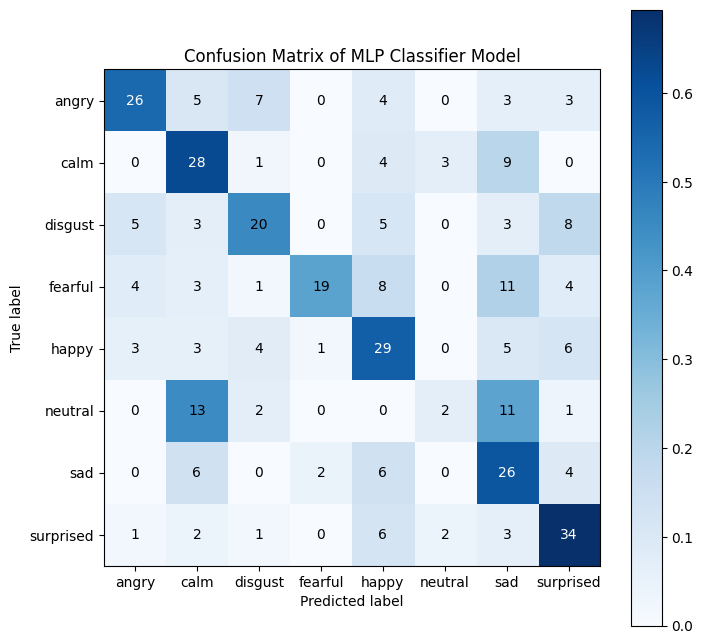

In [ ]:
draw_confusion_matrix(y_test, y_pred, classes=unique_emotions, model_name="MLP Classifier")

# **Logistic Regression Model**

In [ ]:
# Confirmed hyperparameters after several tunings
class_weight_dict = {'ANGRY': 1, 'CALM': 1, 'DISGUST': 1, 'FEARFUL': 1, 'HAPPY': 1, 'NEUTRAL': 2, 'SAD': 1, 'SURPRISED': 1}
model_LR = LogisticRegression(C=5, solver='newton-cg', class_weight=class_weight_dict, max_iter=50000)

# Train the Model

In [ ]:
model_LR.fit(x_train, y_train)

LogisticRegression(C=5,
                   class_weight={'ANGRY': 1, 'CALM': 1, 'DISGUST': 1,
                                 'FEARFUL': 1, 'HAPPY': 1, 'NEUTRAL': 2,
                                 'SAD': 1, 'SURPRISED': 1},
                   max_iter=50000, solver='newton-cg')

# Model evaluation

Accuracy using Logistic Regression model: 42.78%

              precision    recall  f1-score   support

       ANGRY       0.48      0.60      0.54        48
        CALM       0.50      0.44      0.47        45
     DISGUST       0.40      0.41      0.40        44
     FEARFUL       0.56      0.36      0.44        50
       HAPPY       0.33      0.33      0.33        51
     NEUTRAL       0.29      0.34      0.31        29
         SAD       0.37      0.43      0.40        44
   SURPRISED       0.52      0.47      0.49        49

    accuracy                           0.43       360
   macro avg       0.43      0.42      0.42       360
weighted avg       0.44      0.43      0.43       360



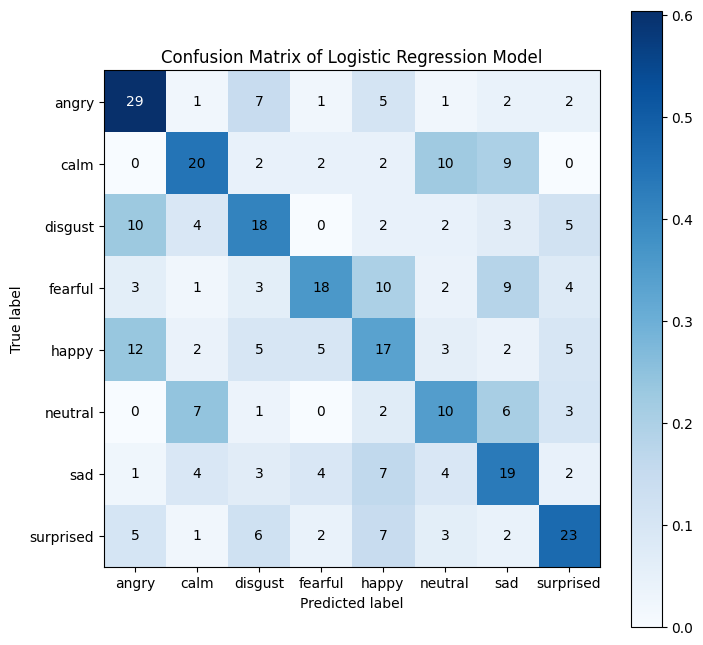

In [ ]:
y_pred = model_LR.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Logistic Regression model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=unique_emotions, model_name="Logistic Regression")

# **Random Forest Classifier Model**

In [ ]:
model_RFC = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the Model

In [ ]:
model_RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

# Model evaluation

Accuracy using Random Forest Classifier model: 58.89%

              precision    recall  f1-score   support

       ANGRY       0.62      0.69      0.65        48
        CALM       0.60      0.96      0.74        45
     DISGUST       0.45      0.57      0.50        44
     FEARFUL       0.73      0.48      0.58        50
       HAPPY       0.54      0.39      0.45        51
     NEUTRAL       0.64      0.31      0.42        29
         SAD       0.66      0.61      0.64        44
   SURPRISED       0.57      0.63      0.60        49

    accuracy                           0.59       360
   macro avg       0.60      0.58      0.57       360
weighted avg       0.60      0.59      0.58       360



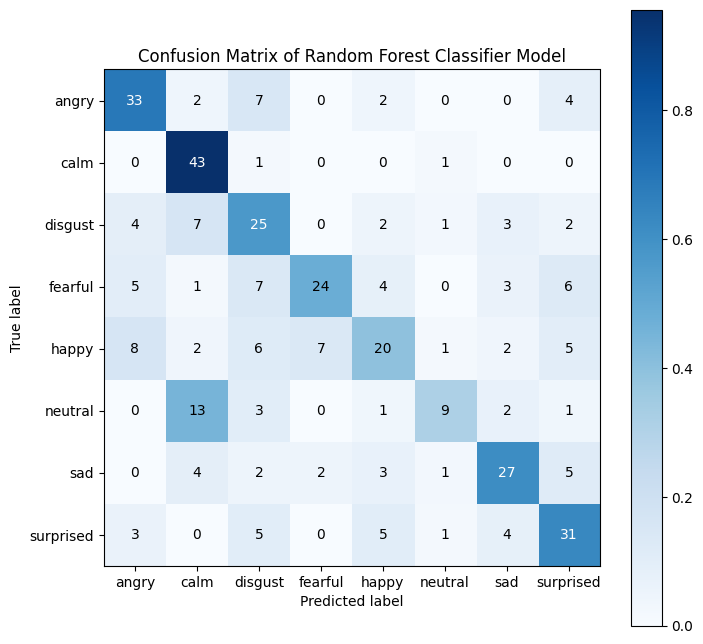

In [ ]:
y_pred = model_RFC.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Random Forest Classifier model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=unique_emotions, model_name="Random Forest Classifier")

# **SVM Model**

In [ ]:
# Confirmed hyperparameters after several tunings
model_SVM = SVC(C=250, max_iter=100000, class_weight=class_weight_dict)

# Train the Model

In [ ]:
model_SVM.fit(x_train, y_train)

SVC(C=250,
    class_weight={'ANGRY': 1, 'CALM': 1, 'DISGUST': 1, 'FEARFUL': 1, 'HAPPY': 1,
                  'NEUTRAL': 2, 'SAD': 1, 'SURPRISED': 1},
    max_iter=100000)

# Model evaluation

Accuracy using SVM model: 49.17%

              precision    recall  f1-score   support

       ANGRY       0.51      0.60      0.55        48
        CALM       0.46      0.58      0.51        45
     DISGUST       0.37      0.41      0.39        44
     FEARFUL       0.61      0.56      0.58        50
       HAPPY       0.50      0.35      0.41        51
     NEUTRAL       0.36      0.66      0.46        29
         SAD       0.70      0.36      0.48        44
   SURPRISED       0.57      0.47      0.52        49

    accuracy                           0.49       360
   macro avg       0.51      0.50      0.49       360
weighted avg       0.52      0.49      0.49       360



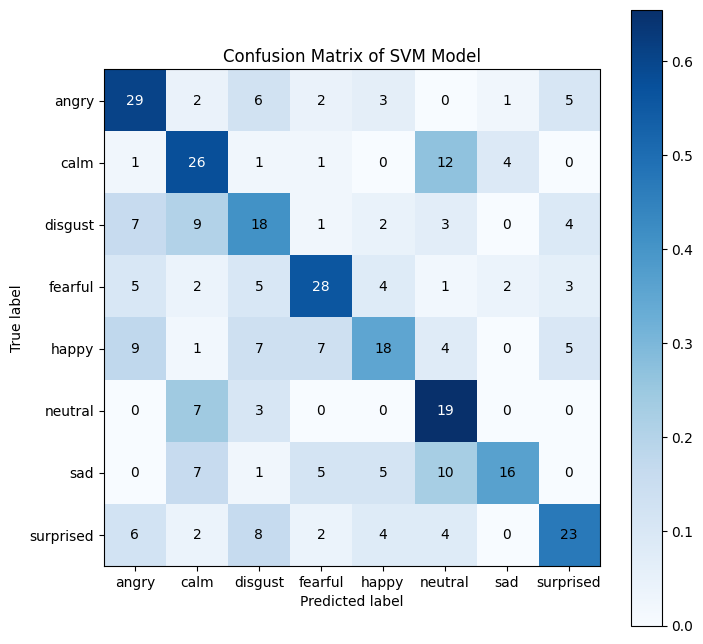

In [ ]:
y_pred = model_SVM.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using SVM model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=unique_emotions, model_name="SVM")

# **Gradient Boosting Classifier Model**

In [ ]:
# Confirmed hyperparameters after several tunings
model_GBC = GradientBoostingClassifier(n_estimators=400, max_depth=7, random_state=50)

# Train the Model

In [ ]:
model_GBC.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=400, random_state=50)

# Model evaluation

Accuracy using Gradient Boosting Classifier model: 63.61%

              precision    recall  f1-score   support

       ANGRY       0.63      0.77      0.69        48
        CALM       0.69      0.89      0.78        45
     DISGUST       0.55      0.61      0.58        44
     FEARFUL       0.69      0.58      0.63        50
       HAPPY       0.68      0.49      0.57        51
     NEUTRAL       0.71      0.41      0.52        29
         SAD       0.55      0.61      0.58        44
   SURPRISED       0.65      0.65      0.65        49

    accuracy                           0.64       360
   macro avg       0.64      0.63      0.63       360
weighted avg       0.64      0.64      0.63       360



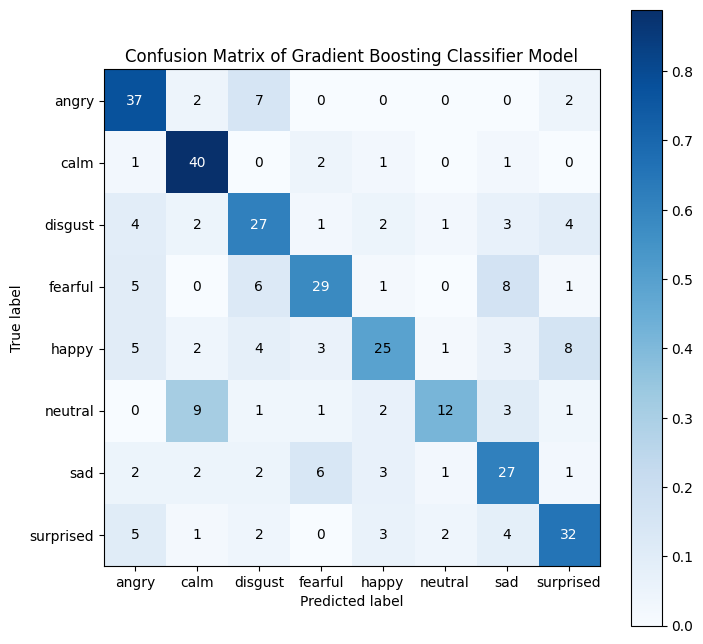

In [ ]:
y_pred = model_GBC.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Gradient Boosting Classifier model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=unique_emotions, model_name="Gradient Boosting Classifier")

<div align="center">

<br>
<br>
<br>
<br>

# Gender Recognition

In this section, I focus on the task of gender recognition, which involves identifying and classifying emotions expressed through speech. I explore different approaches to gender recognition.

<br>
<br>
<br>
<br>


</div>


In [ ]:
gender_classes = ["Female", "Male"]

In [ ]:
#@markdown # Extract Features from Audio Files and Train Test Split
#@markdown ---

#@markdown ## Run Train Test Split and Save the Data
run_train_test_split_for_gender_clf = False #@param {type:"boolean"}
directory = "/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/"

#@markdown If "run_train_test_split_for_gender_clf" is True, a serialized object will be stored in "/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/". Give a file name to store these values "x_train, x_test, y_train, y_test".

train_test_split_for_gender_file_name = "ravdess_train_test_split_for_gender_1" #@param {type:"string"}
directory += f"{train_test_split_for_gender_file_name}.joblib"


if run_train_test_split_for_gender_clf:
  start_time = time.time()
  x_train, x_test, y_train, y_test = load_data(test_size=0.25)
  end_time = time.time()

  total_time = end_time - start_time
  print("Total time taken to extract features from the audio files:", total_time, "seconds")

  joblib.dump((x_train, x_test, y_train, y_test), directory)
  print(f"Train Test Split for Gender CLF is serialized and saved in this directory: {directory}")

#@markdown ---
#@markdown <br>
#@markdown <br>
#@markdown <center><b>Or</b></center>
#@markdown <br>
#@markdown <br>

#@markdown ---
#@markdown ## Load Existing Train Test Split Data
#@markdown When I did my research on gender classification, I performed a train-test split on the dataset. Later on, I saved the split data using joblib so that I can import it for later use instead of re-performing the split every time. This approach saves time and computational resources.

load_gender_test_split = True #@param {type:"boolean"}

#@markdown Train Test Split for Gender will be loaded and saved in 'x_train, x_test, y_train, y_test'.
if load_gender_test_split:
  print("Locating previously saved train test split data for gender clf.")
  existing_train_test_split_gender = "ravdess_train_test_split_for_gender_1" #@param {type:"string"}
  existing_train_test_split_gender = f"/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/{existing_train_test_split_gender}.joblib"
  print(f"Found a latest data in {existing_train_test_split_gender}")

  x_train, x_test, y_train, y_test = joblib.load(existing_train_test_split_gender)
  print("Train Test Split for Gender is loaded and saved successfully in 'x_train, x_test, y_train, y_test'.")

#@markdown ---


print(f"\nShapes: {x_train.shape[0], x_test.shape[0]}")
print(f"Extracted Features: {x_train.shape[1]}")

Locating previously saved train test split data for gender clf.
Found a latest data in /content/drive/MyDrive/Datasets/Bangla Audio/Serialized/ravdess_train_test_split_for_gender_1.joblib
Train Test Split for Gender is loaded and saved successfully in 'x_train, x_test, y_train, y_test'.

Shapes: (1080, 360)
Extracted Features: 180


# **MLPClassifier Model**

In [ ]:
model_MLP = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300, ), learning_rate="adaptive", max_iter=500)

# Train the Model

In [ ]:
model_MLP.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

# Model evaluation

Accuracy using MLP model: 99.72%

              precision    recall  f1-score   support

           F       1.00      0.99      1.00       173
           M       0.99      1.00      1.00       187

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



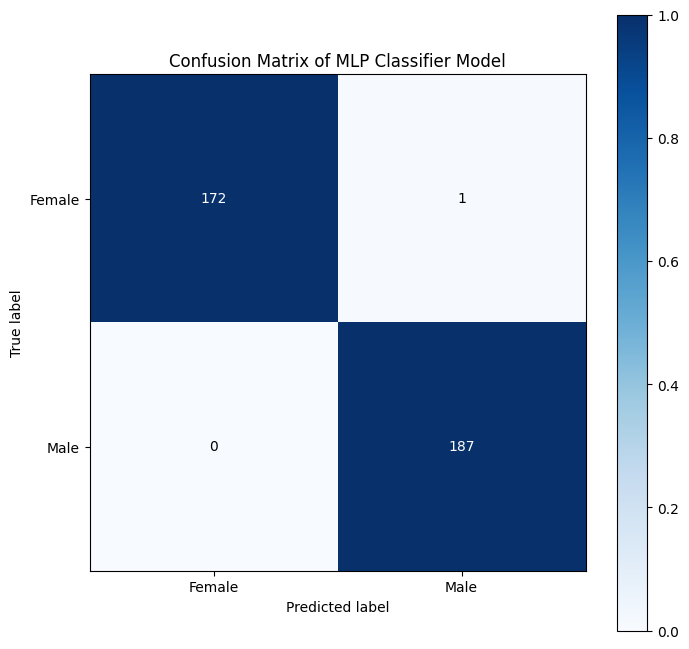

In [ ]:
y_pred = model_MLP.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using MLP model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=gender_classes, model_name="MLP Classifier")

# **Logistic Regression Model**

In [ ]:
model_LR = LogisticRegression(C=5, solver='lbfgs', class_weight='balanced', max_iter=10000)

# Train the Model

In [ ]:
model_LR.fit(x_train, y_train)

LogisticRegression(C=5, class_weight='balanced', max_iter=10000)

# Model evaluation

Accuracy using Logistic Regression model: 98.61%

              precision    recall  f1-score   support

           F       0.98      0.99      0.99       173
           M       0.99      0.98      0.99       187

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



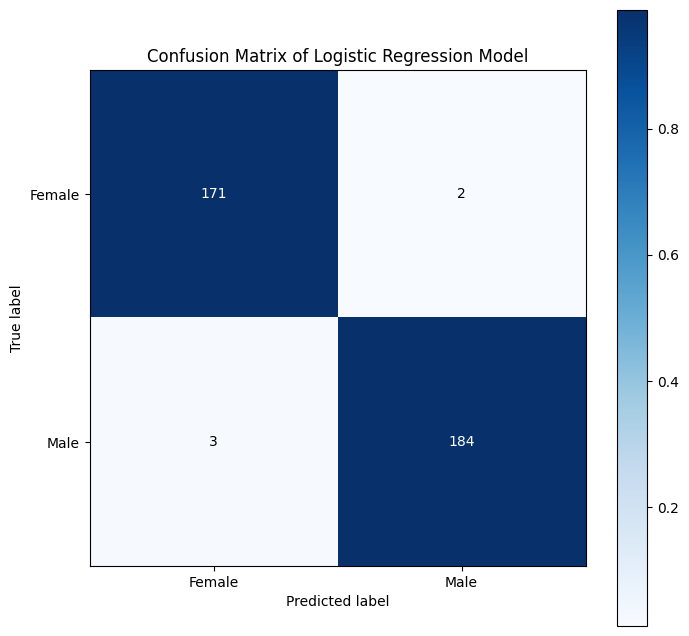

In [ ]:
y_pred = model_LR.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Logistic Regression model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=gender_classes, model_name="Logistic Regression")

# **Random Forest Classifier Model**

In [ ]:
model_RFC = RandomForestClassifier(n_estimators=200, random_state=250)

# Train the Model

In [ ]:
model_RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=250)

# Model evaluation

Accuracy using Random Forest Classifier model: 98.06%

              precision    recall  f1-score   support

           F       0.96      1.00      0.98       173
           M       1.00      0.96      0.98       187

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



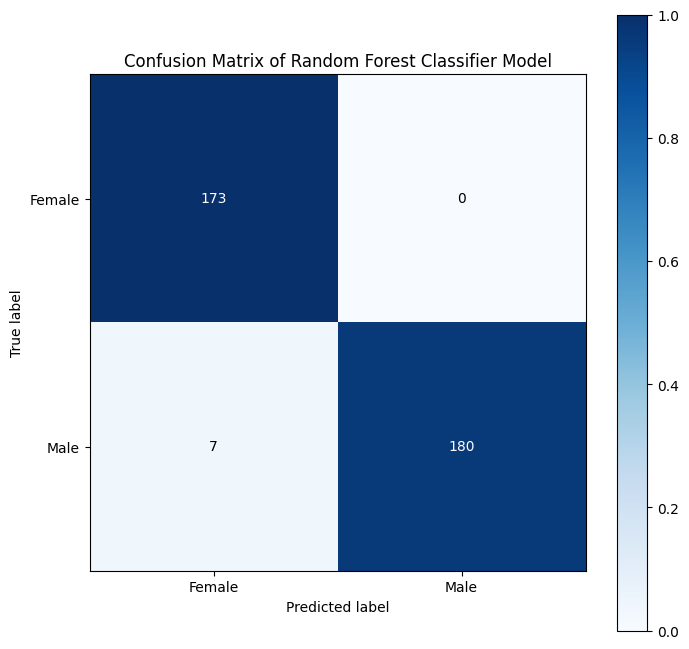

In [ ]:
y_pred = model_RFC.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Random Forest Classifier model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=gender_classes, model_name="Random Forest Classifier")

# **SVM Model**

In [ ]:
# Confirmed hyperparameters after several tunings
model_SVM = SVC(C=47, max_iter=100000)

# Train the Model

In [ ]:
model_SVM.fit(x_train, y_train)

SVC(C=47, max_iter=100000)

# Model evaluation

Accuracy using SVM model: 98.06%

              precision    recall  f1-score   support

           F       0.96      1.00      0.98       173
           M       1.00      0.96      0.98       187

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



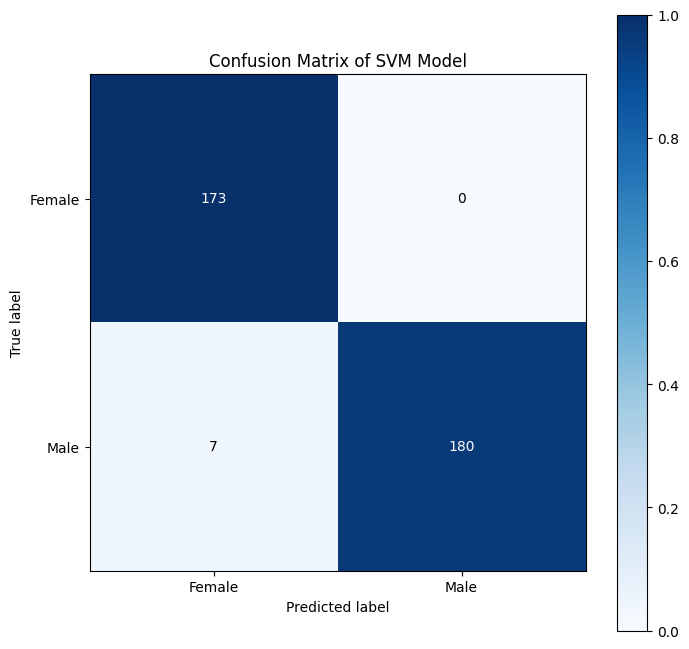

In [ ]:
y_pred = model_SVM.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using SVM model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=gender_classes, model_name="SVM")

# **Gradient Boosting Classifier Model**

In [ ]:
# Confirmed hyperparameters after several tunings
model_GBC = GradientBoostingClassifier(n_estimators=400, max_depth=7, random_state=42)

# Train the Model

In [ ]:
model_GBC.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=400, random_state=42)

# Model evaluation

Accuracy using Gradient Boosting Classifier model: 95.83%

              precision    recall  f1-score   support

           F       0.95      0.97      0.96       173
           M       0.97      0.95      0.96       187

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



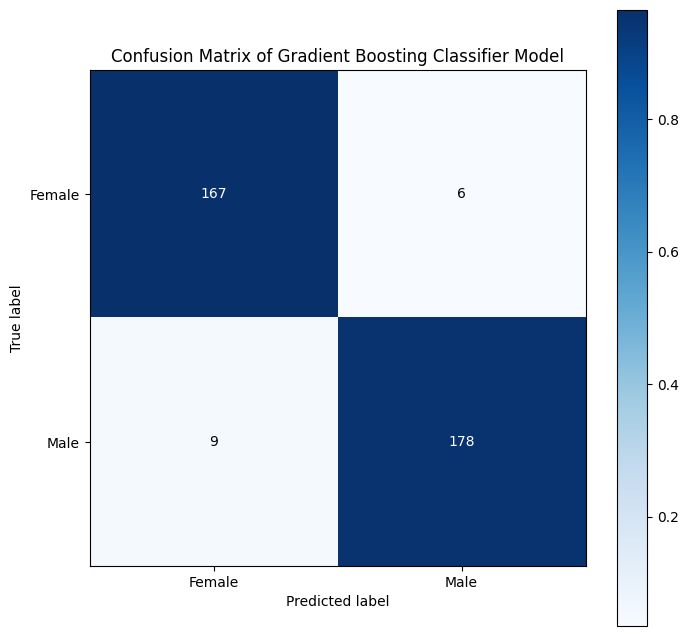

In [ ]:
y_pred = model_GBC.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Gradient Boosting Classifier model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=gender_classes, model_name="Gradient Boosting Classifier")

<div align="center">

<br>
<br>
<br>
<br>

# Speaker Recognition

In this section, I focus on the task of speaker recognition, which involves identifying and classifying emotions expressed through speech. I explore different approaches to speaker recognition.

<br>
<br>
<br>
<br>


</div>


In [ ]:
#@markdown # Total Speakers
#@markdown This cell will show the total number of speakers and their names.

speakers, speakers_number = df['speaker_name'].unique(), df['speaker_name'].nunique()
speakers = [i.lower() for i in speakers]
speakers.sort()

print("Total Speakers:", speakers_number)

print("Speakers:", speakers)

Total Speakers: 24
Speakers: ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']


In [ ]:
#@markdown # Extract Features from Audio Files and Train Test Split
#@markdown ---

#@markdown ## Run Train Test Split and Save the Data
run_train_test_split_for_speaker_clf = False #@param {type:"boolean"}
directory = "/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/"

#@markdown If "run_train_test_split_for_speaker_clf" is True, a serialized object will be stored in "/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/". Give a file name to store these values "x_train, x_test, y_train, y_test".

train_test_split_for_speaker_file_name = "ravdess_train_test_split_for_speaker_1" #@param {type:"string"}
directory += f"{train_test_split_for_speaker_file_name}.joblib"


if run_train_test_split_for_speaker_clf:
  start_time = time.time()
  x_train, x_test, y_train, y_test = load_data(test_size=0.25)
  end_time = time.time()

  total_time = end_time - start_time
  print("Total time taken to extract features from the audio files:", total_time, "seconds")

  joblib.dump((x_train, x_test, y_train, y_test), directory)
  print(f"Train Test Split for Speaker CLF is serialized and saved in this directory: {directory}")

#@markdown ---
#@markdown <br>
#@markdown <br>
#@markdown <center><b>Or</b></center>
#@markdown <br>
#@markdown <br>

#@markdown ---
#@markdown ## Load Existing Train Test Split Data
#@markdown When I did my research on speaker classification, I performed a train-test split on the dataset. Later on, I saved the split data using joblib so that I can import it for later use instead of re-performing the split every time. This approach saves time and computational resources.

load_speaker_test_split = True #@param {type:"boolean"}

#@markdown Train Test Split for Speaker will be loaded and saved in 'x_train, x_test, y_train, y_test'.
if load_speaker_test_split:
  print("Locating previously saved train test split data for speaker clf.")
  existing_train_test_split_speaker = "ravdess_train_test_split_for_speaker_1" #@param {type:"string"}
  existing_train_test_split_speaker = f"/content/drive/MyDrive/Datasets/Bangla Audio/Serialized/{existing_train_test_split_speaker}.joblib"
  print(f"Found a latest data in {existing_train_test_split_speaker}")

  x_train, x_test, y_train, y_test = joblib.load(existing_train_test_split_speaker)
  print("Train Test Split for Speaker is loaded and saved successfully in 'x_train, x_test, y_train, y_test'.")

#@markdown ---


print(f"\nShapes: {x_train.shape[0], x_test.shape[0]}")
print(f"Extracted Features: {x_train.shape[1]}")

Locating previously saved train test split data for speaker clf.
Found a latest data in /content/drive/MyDrive/Datasets/Bangla Audio/Serialized/ravdess_train_test_split_for_speaker_1.joblib
Train Test Split for Speaker is loaded and saved successfully in 'x_train, x_test, y_train, y_test'.

Shapes: (1080, 360)
Extracted Features: 180


# **MLPClassifier Model**

In [ ]:
model_MLP = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300, ), learning_rate="adaptive", max_iter=400)

# Train the Model

In [ ]:
model_MLP.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=400)

# Model evaluation

Accuracy using MLP model: 96.39%

              precision    recall  f1-score   support

          01       0.93      0.93      0.93        14
          02       1.00      1.00      1.00        16
          03       0.94      0.94      0.94        16
          04       1.00      0.93      0.96        14
          05       1.00      1.00      1.00        20
          06       0.90      0.90      0.90        10
          07       0.94      1.00      0.97        17
          08       1.00      1.00      1.00        11
          09       1.00      0.82      0.90        17
          10       1.00      0.93      0.97        15
          11       1.00      1.00      1.00        13
          12       1.00      0.95      0.97        20
          13       1.00      1.00      1.00        12
          14       0.95      0.95      0.95        19
          15       0.94      1.00      0.97        15
          16       0.93      1.00      0.96        13
          17       1.00      1.00      1.00    

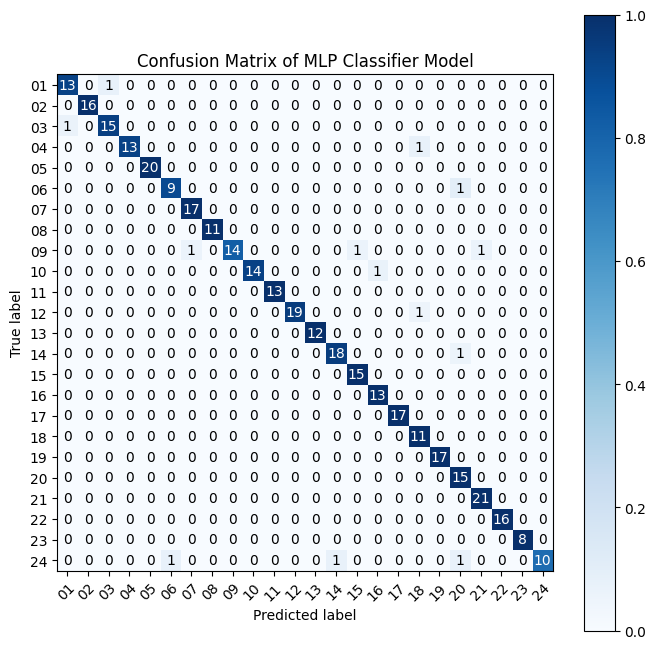

In [ ]:
y_pred = model_MLP.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using MLP model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=speakers, model_name="MLP Classifier", x_axis_rotation=True)

# **Logistic Regression Model**

In [ ]:
model_LR = LogisticRegression(C=5, solver='lbfgs', class_weight='balanced', max_iter=10000)

# Train the Model

In [ ]:
model_LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5, class_weight='balanced', max_iter=10000)

# Model evaluation

Accuracy using Logistic Regression model: 94.72%

              precision    recall  f1-score   support

          01       1.00      1.00      1.00        14
          02       0.94      0.94      0.94        16
          03       0.94      1.00      0.97        16
          04       1.00      0.93      0.96        14
          05       1.00      1.00      1.00        20
          06       0.90      0.90      0.90        10
          07       1.00      1.00      1.00        17
          08       0.92      1.00      0.96        11
          09       0.94      0.88      0.91        17
          10       1.00      0.87      0.93        15
          11       1.00      1.00      1.00        13
          12       1.00      0.95      0.97        20
          13       1.00      0.92      0.96        12
          14       0.86      0.95      0.90        19
          15       0.93      0.93      0.93        15
          16       1.00      1.00      1.00        13
          17       0.94      1.

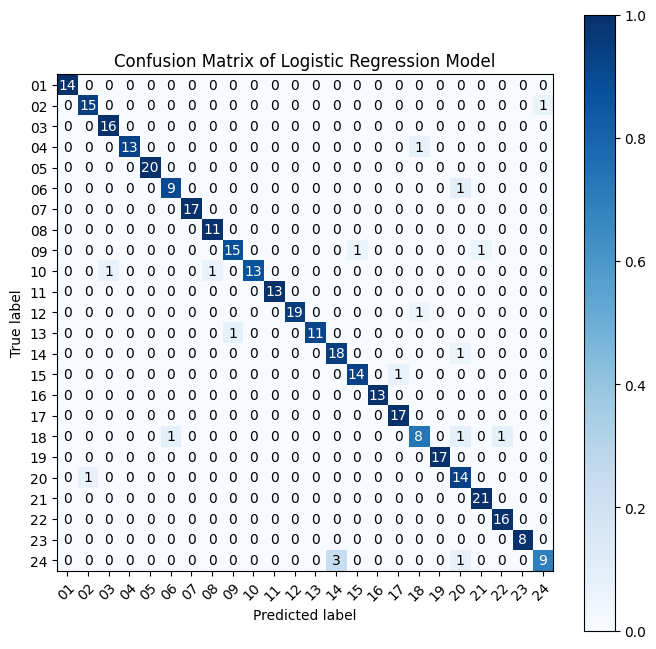

In [ ]:
y_pred = model_LR.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Logistic Regression model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=speakers, model_name="Logistic Regression", x_axis_rotation=True)

# **Random Forest Classifier Model**

In [ ]:
model_RFC = RandomForestClassifier(n_estimators=200, random_state=250)

# Train the Model

In [ ]:
model_RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=250)

# Model evaluation

Accuracy using Random Forest Classifier model: 86.67%

              precision    recall  f1-score   support

          01       1.00      0.64      0.78        14
          02       0.88      0.88      0.88        16
          03       0.80      1.00      0.89        16
          04       0.59      0.71      0.65        14
          05       1.00      0.75      0.86        20
          06       0.69      0.90      0.78        10
          07       1.00      0.76      0.87        17
          08       0.73      1.00      0.85        11
          09       1.00      0.88      0.94        17
          10       0.88      1.00      0.94        15
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00        20
          13       0.71      1.00      0.83        12
          14       0.76      0.68      0.72        19
          15       0.88      1.00      0.94        15
          16       1.00      1.00      1.00        13
          17       0.80   

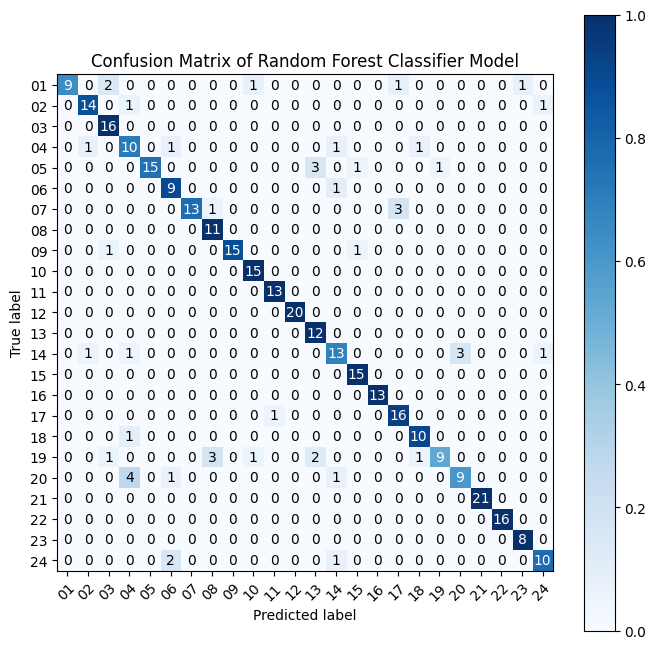

In [ ]:
y_pred = model_RFC.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Random Forest Classifier model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=speakers, model_name="Random Forest Classifier", x_axis_rotation=True)

# **SVM Model**

In [ ]:
# Confirmed hyperparameters after several tunings
model_SVM = SVC(C=700, max_iter=100000)

# Train the Model

In [ ]:
model_SVM.fit(x_train, y_train)

SVC(C=700, max_iter=100000)

# Model evaluation

Accuracy using SVM model: 96.11%

              precision    recall  f1-score   support

          01       1.00      1.00      1.00        14
          02       0.84      1.00      0.91        16
          03       1.00      1.00      1.00        16
          04       1.00      0.93      0.96        14
          05       0.95      1.00      0.98        20
          06       1.00      0.90      0.95        10
          07       1.00      1.00      1.00        17
          08       0.92      1.00      0.96        11
          09       1.00      0.94      0.97        17
          10       1.00      0.93      0.97        15
          11       1.00      1.00      1.00        13
          12       1.00      0.95      0.97        20
          13       1.00      0.92      0.96        12
          14       0.95      0.95      0.95        19
          15       0.93      0.93      0.93        15
          16       1.00      1.00      1.00        13
          17       0.94      1.00      0.97    

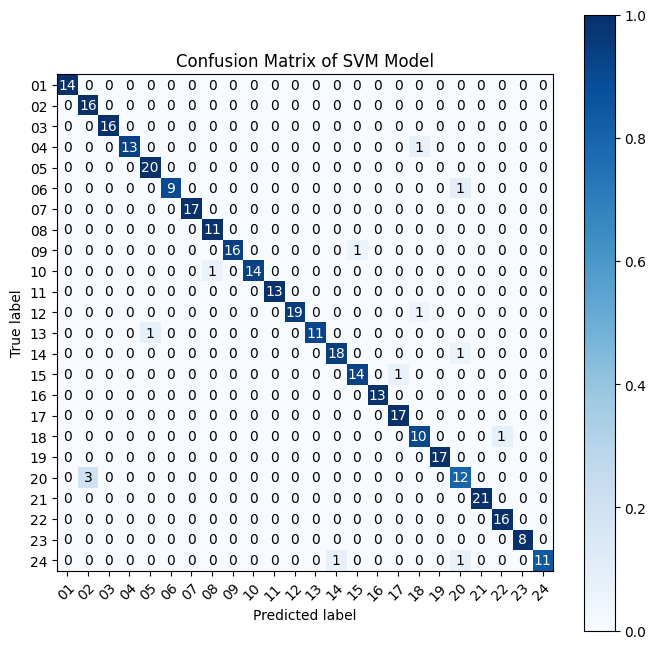

In [ ]:
y_pred = model_SVM.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using SVM model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=speakers, model_name="SVM", x_axis_rotation=True)

# **Gradient Boosting Classifier Model**

In [ ]:
# Confirmed hyperparameters after several tunings
model_GBC = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the Model

In [ ]:
model_GBC.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

# Model evaluation

Accuracy using Gradient Boosting Classifier model: 79.17%

              precision    recall  f1-score   support

          01       1.00      0.71      0.83        14
          02       0.65      0.94      0.77        16
          03       0.82      0.88      0.85        16
          04       0.64      0.50      0.56        14
          05       0.89      0.80      0.84        20
          06       0.91      1.00      0.95        10
          07       0.68      0.76      0.72        17
          08       0.83      0.91      0.87        11
          09       1.00      0.82      0.90        17
          10       0.93      0.93      0.93        15
          11       0.88      0.54      0.67        13
          12       0.94      0.75      0.83        20
          13       0.62      0.83      0.71        12
          14       0.76      0.84      0.80        19
          15       0.92      0.80      0.86        15
          16       0.92      0.85      0.88        13
          17       0.6

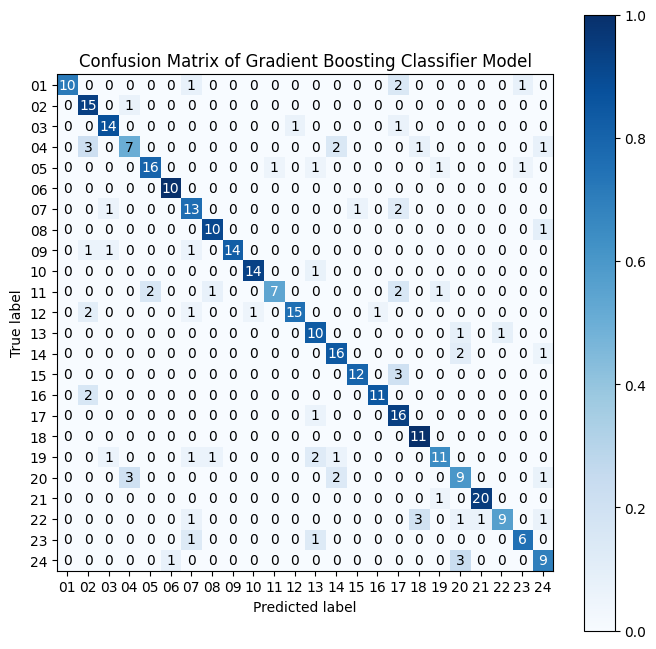

In [ ]:
y_pred = model_GBC.predict(x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy using Gradient Boosting Classifier model: {accuracy * 100 :.2f}%\n")

print(classification_report(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, classes=speakers, model_name="Gradient Boosting Classifier")